In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import string
from nltk.corpus import stopwords
def textPreprocessing(data):
    removePunctuation = [ char for char in data if char not in string.punctuation ]
    sentences = ''.join(removePunctuation)
    words = sentences.split()
    removeStopwords = [ word for word in words if word not in stopwords.words('english')]
    return removeStopwords

In [3]:
data = pd.read_csv('smsspamcollection/SMSSpamCollection' , sep='\t' , names =['label','message'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [5]:
data.label.unique() #Binary Classification

array(['ham', 'spam'], dtype=object)

In [6]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

(array([  7.,  16.,  23.,  24.,  54., 121., 408.,  89.,   4.,   1.]),
 array([ 13.,  34.,  55.,  76.,  97., 118., 139., 160., 181., 202., 223.]),
 <a list of 10 Patch objects>)

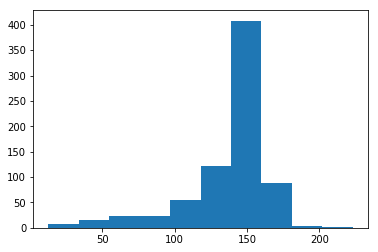

In [17]:
plt.hist(data[data.label == 'spam']['message'].apply(len))

(array([1.64e+02, 1.45e+03, 9.84e+02, 5.89e+02, 4.28e+02, 2.58e+02,
        2.59e+02, 2.20e+02, 2.82e+02, 5.60e+01, 2.50e+01, 1.50e+01,
        1.70e+01, 1.20e+01, 5.00e+00, 1.40e+01, 8.00e+00, 9.00e+00,
        5.00e+00, 2.00e+00, 5.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        5.00e+00, 2.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([  2.  ,  20.16,  38.32,  56.48,  74.64,  92.8 , 110.96, 129.12,
        147.28, 165.44, 183.6 , 201.76, 219.92, 238.08, 256.24, 274.4 ,
        292.56, 310.72, 328.88, 347.04, 365.2 , 383.36, 401.52, 419.68,
        437.84, 456.  , 474.16, 492.32, 510.48, 528.64, 546.8 , 564.96,
        583.12, 601.28, 619.44, 637.6 , 655.76, 673.92, 692.08, 710.24,
        728.4 , 746.56, 764.72, 782.88, 801.04, 819.2 , 837.36, 85

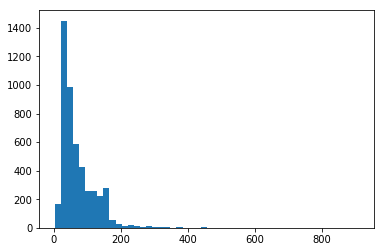

In [21]:
plt.hist(data[data.label == 'ham']['message'].apply(len) , bins=50)

In [22]:
#Prepare our feature compatible for ML algorithm
#Sklearn helps you to achieve this target
# text Features ====> BagOfWords ===> TF-IDF ===> Freq ==> Feature Array

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
wordVector = CountVectorizer(analyzer=textPreprocessing)
finalWordVectorCreator = wordVector.fit(data['message'])

In [25]:
bow = finalWordVectorCreator.transform(data['message'])

In [26]:
#Tf-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidfObject = TfidfTransformer().fit(bow)

In [27]:
#Create Features
features = tfidfObject.transform(bow)

In [29]:
#Create Model
from sklearn.naive_bayes import MultinomialNB #Best for Text Data Features
model = MultinomialNB()
model.fit(features,data['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
model.score(features,data['label'])

0.9791816223977028

In [31]:
#Realtime Input Example
inputSMS = input("Enter SMS to check: ")
preprocessText = textPreprocessing(inputSMS)
bowText = finalWordVectorCreator.transform(preprocessText)
featureText = tfidfObject.transform(bowText)
predict = model.predict(featureText)[0]
print("Given SMS is a {} SMS".format(predict))

Enter SMS to check: Win Lottery Guaranteed!!!
Given SMS is a spam SMS
